In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
dataset1=pd.read_csv("dataset-of-00s.csv")
dataset1.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [3]:
#checking for description AND information of the table
dataset1.describe()
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [4]:
#Checking for missing values
dataset1.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [5]:
#checking data integrity
"""
Checking data integrity is the way of checking if the number of rows is equal to the number of non null values
"""
dataset1.shape

(5872, 19)

In [6]:
#checking for unique records using Uri columns
def extract(x):
    splited_list=x.split(':')
    return splited_list[2]
dataset1['uri']=dataset1['uri'].apply(extract)

In [7]:
dataset1.head(4)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0


In [8]:
#Checking for duplicate rows
dataset1['uri'].nunique(),

(5855,)

In [9]:
dataset1['uri'].value_counts()

6pWzCKTrKrwbUPzY8RLCoP    2
6NvRxjfYkkT2SpirAlmsjH    2
561jH07mF1jHuk7KlaeF0s    2
1qHRFZE8qykNXYZadzmi1m    2
1mJ05BN0So26a14iib85aI    2
                         ..
3xrn9i8zhNZsTtcoWgQEAd    1
4TJ56OkWrnf2fv2a6T69DL    1
0mUyMawtxj1CJ76kn9gIZK    1
68Zq7PMcPIQE8ol1x3gAqw    1
6sbXGUn9V9ZaLwLdOfpKRE    1
Name: uri, Length: 5855, dtype: int64

In [10]:
dupe_mask=dataset1['uri'].value_counts()==2

In [11]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 6pWzCKTrKrwbUPzY8RLCoP    True
 6NvRxjfYkkT2SpirAlmsjH    True
 561jH07mF1jHuk7KlaeF0s    True
 1qHRFZE8qykNXYZadzmi1m    True
 1mJ05BN0So26a14iib85aI    True
 3f3omU8n47Mqyab5nCaGyT    True
 7Kpqjspw4Y7HrvItIRcBiW    True
 77FULy278MulVvGWS8BfK7    True
 49bUJjrC16NgnrgGS75Yan    True
 5YSW99IUAIiAj243jF7PBO    True
 4TbNLKRLKlxZDlS0pu7Lsy    True
 2aIdVb8v9KTpEZnftkz2mD    True
 0t9Jd84JnsV8HRMaQzHUom    True
 4gGYiGsxhPYpsGIttWLwlT    True
 3XVBdLihbNbxUwZosxcGuJ    True
 0Uhnzk5zI46IRlQ04LNOtc    True
 7uKcScNXuO3MWw6LowBjW1    True
 Name: uri, dtype: bool>,
 (17,))

In [12]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['6pWzCKTrKrwbUPzY8RLCoP',
 '6NvRxjfYkkT2SpirAlmsjH',
 '561jH07mF1jHuk7KlaeF0s',
 '1qHRFZE8qykNXYZadzmi1m',
 '1mJ05BN0So26a14iib85aI',
 '3f3omU8n47Mqyab5nCaGyT',
 '7Kpqjspw4Y7HrvItIRcBiW',
 '77FULy278MulVvGWS8BfK7',
 '49bUJjrC16NgnrgGS75Yan',
 '5YSW99IUAIiAj243jF7PBO',
 '4TbNLKRLKlxZDlS0pu7Lsy',
 '2aIdVb8v9KTpEZnftkz2mD',
 '0t9Jd84JnsV8HRMaQzHUom',
 '4gGYiGsxhPYpsGIttWLwlT',
 '3XVBdLihbNbxUwZosxcGuJ',
 '0Uhnzk5zI46IRlQ04LNOtc',
 '7uKcScNXuO3MWw6LowBjW1']

In [13]:
duplicate_index = dataset1.loc[dataset1['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

In [14]:
#Removing all the duplication Rows
dataset1.drop(duplicate_index,axis=0,inplace=True)
dataset1.shape

(5838, 19)

In [15]:
print("shape of data",dataset1.shape )
print("no. of unique rows",dataset1['uri'].nunique()) # no duplicates

shape of data (5838, 19)
no. of unique rows 5838


In [16]:
#Now we need to drop all the unecessary columns which countain string 
dataset1.drop(['track','artist','uri'],axis=1,inplace=True)

In [17]:
dataset1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [18]:
#Univariate analysis
"""
In this type of analysis we wll be checking if the class is balanced or not
"""

'\nIn this type of analysis we wll be checking if the class is balanced or not\n'

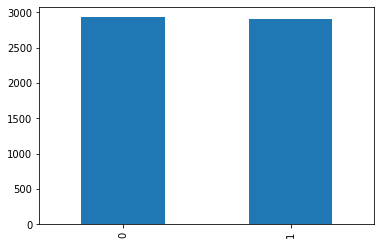

In [19]:
dataset1["target"].value_counts().plot.bar()
plt.show()

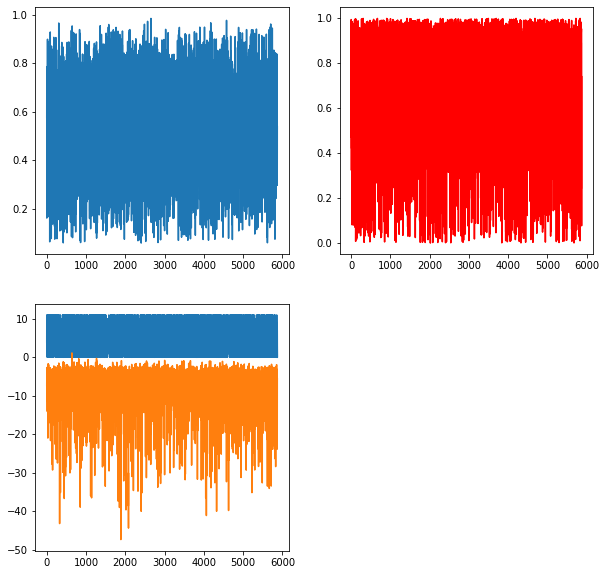

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
dataset1['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(dataset1['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(dataset1[['key','loudness']])

In [21]:
"""
As we can notice the loudness column consists of some error out of range(0,-60)db 
"""
loudness_error=dataset1[dataset1['loudness']>0].index
loudness_error

Int64Index([642], dtype='int64')

In [22]:
#Removing the error in loudness column
dataset1.drop(loudness_error,axis=0,inplace=True)

In [23]:
dataset1.shape

(5837, 16)

In [26]:
#Saving to csv
dataset1.to_csv("cleaned_data_00.csv")